# **🗃️ Data Lab**

Useful dataset: [Fruits dataset](https://drive.google.com/file/d/1Jn15Qra1NldKC6ELVTTFWrqZ5OJdK5pL/view?usp=sharing)

## Generate samples 🎯

In [ ]:
import time
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

# @markdown \

# ============
# Parameters
# ============

n_samples = 500 # @param {type:"integer"}
type_dataset = "noisy_moons" # @param ["noisy_circles", "noisy_moons", "blobs", "no_structure", "anisotropic", "varied_var"]
noise = 0.05 # @param {type:"slider", min:0, max:0.5, step:0.01}
angle_aniso = 110 # @param {type:"slider", min:0, max:180, step:10}
random_state = 4 # @param {type:"integer"}


# ===================
# Generate datasets
# ===================

if type_dataset == "noisy_circles":
  X, _ = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=noise, random_state=random_state)

elif type_dataset == "noisy_moons":
  X, _ = datasets.make_moons(n_samples=n_samples, noise=noise, random_state=random_state)

elif type_dataset == "blobs":
  X, _ = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
  X += np.random.rand(n_samples, 2)*noise*X.min()

elif type_dataset == "no_structure":
  X = np.random.rand(n_samples, 2)

elif type_dataset == "anisotropic":
  X, _ = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
  t = np.tan(np.radians(angle_aniso))
  transformation = np.array(((1, t), (0, 1))).T
  X = np.dot(X, transformation)
  X += np.random.rand(n_samples, 2)*noise*X.min()

elif type_dataset == "varied_var":
  X, _ = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
  X += np.random.rand(n_samples, 2)*noise*X.min()

_, ax = plt.subplots(figsize=(5,4))
ax.scatter(X[:, 0], X[:, 1], edgecolors='k')

print ("\nData shape: {0} \n".format(X.shape))

## Load a dataset 📑


Data Loaded! ✅ 



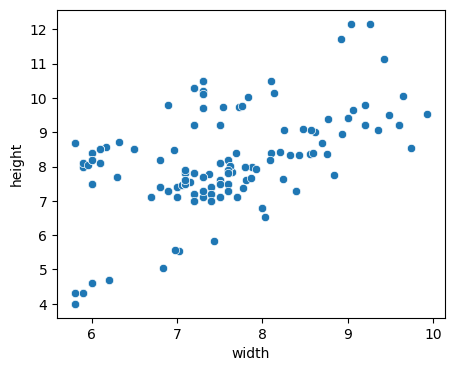

In [ ]:
# @markdown ---

# @markdown \
# @markdown ### 🔼 Upload your file (first)
# @markdown \

# @markdown ---
# @markdown ### Enter path to **.csv* file:
file_path = "/content/Data/fruits_data_ext.csv" # @param {type:"string"}

var_h = "width" # @param {type:"string"}
var_v = "height" # @param {type:"string"}
labels = "fruit_label" # @param {type:"string"}
normalization = "None" # @param ["MinMax [0,1]", "MinMax [-1,1]", "Z-Score", "None"]


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv(file_path)
X = np.c_[np.array(data[var_h]), np.array(data[var_v])]
y = np.array(data[labels]) if labels != "" else None

if   normalization == "MinMax [0,1]":
  X = MinMaxScaler().fit_transform(X)
elif normalization == "MinMax [-1,1]":
  X = MinMaxScaler(feature_range=(-1,1)).fit_transform(X)
elif normalization == "Z-Score":
  X = StandardScaler().fit_transform(X)

data[var_h], data[var_v] = X[:, 0], X[:, 1]

_, ax = plt.subplots (figsize=(5,4))
# ax.scatter(X[:, 0], X[:, 1], c=y, cmap='Paired', edgecolors='k')
sns.scatterplot(ax=ax,data=data,x=var_h,y=var_v, hue=labels if labels != "" else None, palette='colorblind')
print ("\nData Loaded! ✅ \n")


# **📋 Model Lab**

In [ ]:
from sklearn import cluster, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

# @markdown \

model = "SpectralClustering" # @param ["Kmeans", "MiniBatchKMeans", "MeanShift", "Ward", "SpectralClustering", "DBSCAN", "OPTICS", "AgglomerativeClustering", "GaussianMixture"]
n_clusters = 2 # @param {type:"integer"}

# @markdown ---
# @markdown \
# @markdown ### ✏️ Aditional Params
# @markdown \
random_state = 4 # @param {type:"integer"}
kmeans_init = "random" # @param ["k-means++", "random"]
metric = "euclidean" # @param ["euclidean", "cityblock", "cosine", "l1", "l2", "chebyshev", "mahalanobis"]
n_neighbors = 2 # @param {type:"integer"}
bandwidth = 0.1 # @param {type:"number"}
eigen_solver = "arpack" # @param ["arpack", "lobpcg", "amg"]
eps = 0.1 # @param {type:"number"}


X = StandardScaler().fit_transform(X)

if model == "Kmeans":
  algo = cluster.KMeans(n_clusters=n_clusters, init=kmeans_init, random_state=random_state)

elif model == "MiniBatchKMeans":
  algo = cluster.MiniBatchKMeans(n_clusters=n_clusters, init=kmeans_init, random_state=random_state)

elif model == "MeanShift":
  algo = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True, random_state=random_state)

elif model == "Ward":
  connectivity = kneighbors_graph(X, n_neighbors=n_neighbors, include_self=False)
  algo = cluster.AgglomerativeClustering(n_clusters=n_clusters, linkage="ward", \
                                         metric=metric, connectivity=connectivity)

elif model == "SpectralClustering":
  algo = cluster.SpectralClustering(n_clusters=n_clusters, \
                                    eigen_solver=eigen_solver, \
                                    affinity="nearest_neighbors", \
                                    random_state=random_state)

elif model == "DBSCAN":
  algo = cluster.DBSCAN(eps=eps, metric=metric)

elif model == "AgglomerativeClustering":
  connectivity = kneighbors_graph(X, n_neighbors=n_neighbors, include_self=False)
  algo = cluster.AgglomerativeClustering(linkage="average", metric=metric, \
                                          n_clusters=n_clusters, \
                                          connectivity=connectivity)

elif model == "GaussianMixture":
  algo = mixture.GaussianMixture(n_components=n_clusters, covariance_type="full", random_state=random_state)


print ("\nModel {0} is ready!\n".format(model))

# **🤖 Run training!**

In [ ]:
from itertools import cycle, islice

# @markdown ### Start now 🦾
# @markdown \


algo.fit(X)

if hasattr(algo, "labels_"):
    pred = algo.labels_.astype(int)
else:
    pred = algo.predict(X)

_, ax = plt.subplots(figsize=(5,4))
ax.set_title("{0}".format(model))

print ("\nTraining done! ✅")

colors = np.array(list(islice(cycle(["#377eb8", "#ff7f00", "#4daf4a", "#f781bf", "#a65628", \
                                     "#984ea3", "#999999", "#e41a1c", "#dede00", "#000000"]), int(max(pred) + 1),)))

ax.scatter(X[:, 0], X[:, 1], c=colors[pred], edgecolors='k')
print ("Plots... \n")